In [52]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import pearsonr
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

import seaborn as sns
sns.set()


# Encode categorical variables if any
# (You may need this step if you have categorical variables in your dataset)








In [53]:
# Step 2: Load dataset into a pandas DataFrame
# Assuming your dataset is in a CSV file named 'data.csv'
data = pd.read_excel('Main-data.xlsx')

data1 = data.copy()
data3 = data2.copy()

In [54]:
# Step 3: Preprocess the data
# Handle missing values if any
data1.dropna(inplace=True)


In [55]:
# Encode categorical variables using mapping
# Assuming 'G6PD STATUS' is a categorical variable
# Create a dictionary to map categories to numerical values
data1['G6PD STATUS']= data1['G6PD STATUS'].map({'NORMAL': 1, 'DEFICIENT' : 0})
data1

,S/N,NAME,RESULTS,G6PD STATUS,SEX,AGE
0,1,ADEGOKE KADIJAT,5.9,0,F,60
1,2,KAREEM SALAWAT,6.8,0,F,68
2,3,AJAYI CHRISTIANAH,6.6,0,F,56
3,4,OLAYE JOY,6.3,0,F,75
4,5,OLANIYI PEACE,5.9,0,F,52
5,6,ADESOPE DAVID,5.8,0,M,60
6,7,ALADE RUTH,6.0,1,F,73
7,8,OJO CHARLES,5.9,0,M,58
8,9,OLAYIWOLA KEHINDE,6.4,0,M,49
9,10,LAWAL SEGUN,6.9,1,M,66


In [56]:
# Step 4: Split the data into independent and dependent variables
x = data1[['RESULTS']]  # Independent variable
y = data1['G6PD STATUS']  # Dependent variable


In [57]:
# Step 5: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [58]:
# Step 6: Choose a machine learning algorithm and train the model
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [59]:

# Step 7: Evaluate the model's performance
# Make predictions on the test set
y_pred = model.predict(x_test)


In [60]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [61]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



C:\Users\hunsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hunsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hunsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
correlation_coefficient, p_value = pearsonr(data1['G6PD STATUS'], data1['RESULTS'])

In [63]:
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.24587860955453178
P-value: 0.12617822931849598


Optimization terminated successfully.
         Current function value: 0.558362
         Iterations 5


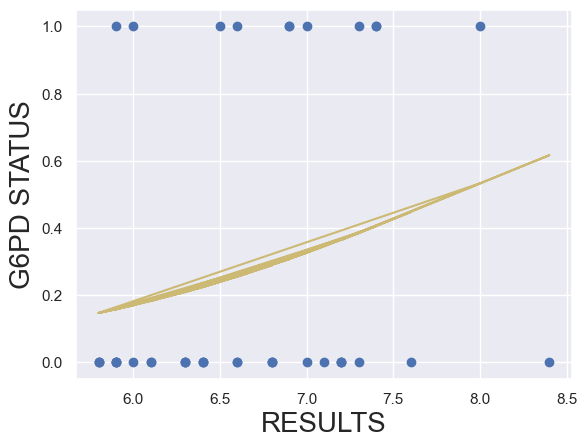

In [64]:
x1 = sm.add_constant(x)
reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()

def f(x1, b0, b1):
    return np.array(np.exp(b0 + x1*b1) / (1 + np.exp(b0 + x1*b1)))

f_sorted = np.sort(f(x, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x))

plt.scatter(x, y, color = 'C0')
plt.xlabel('RESULTS', fontsize= 20)
plt.ylabel('G6PD STATUS', fontsize= 20)
plt.plot(x_sorted, f_sorted, color = 'C8')

plt.show()

In [65]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            G6PD STATUS   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                 0.05068
Time:                        11:54:57   Log-Likelihood:                -22.334
converged:                       True   LL-Null:                       -23.527
Covariance Type:            nonrobust   LLR p-value:                    0.1225
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7395      3.896     -1.730      0.084     -14.376       0.897
RESULTS        0.8591      0.572      1.501      0.133      -0.263       1.981
==============================================================================
"""

<Axes: xlabel='RESULTS', ylabel='G6PD STATUS'>

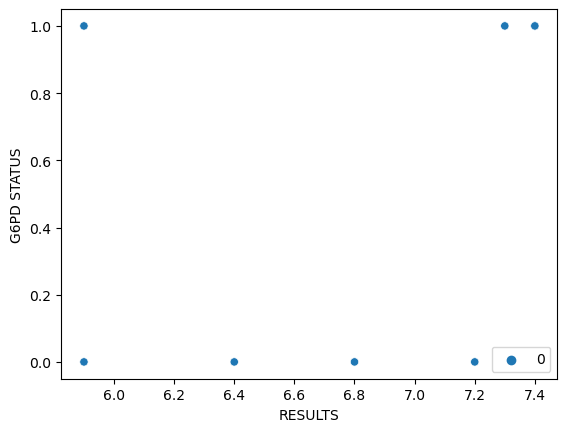

In [37]:
# Visualize the results
sns.scatterplot(x=x_test['RESULTS'], y=y_test, hue=y_pred)

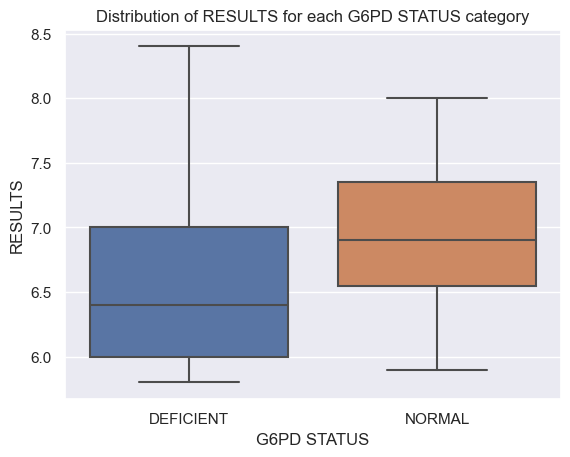

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'RESULTS' and 'G6PD STATUS' columns

# Plotting the distribution of 'RESULTS' for each category of 'G6PD STATUS'
sns.boxplot(x='G6PD STATUS', y='RESULTS', data=data)
plt.xlabel('G6PD STATUS')
plt.ylabel('RESULTS')
plt.title('Distribution of RESULTS for each G6PD STATUS category')
plt.show()